# Alfredo Winston - 2702297776

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle


from warnings import filterwarnings
filterwarnings('ignore')

# Read and Overview Data

In [2]:
df = pd.read_csv('ObesityDataSet2.csv')

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [3]:
# Checking Number of Rows and Columns

df.shape

(1056, 17)

In [4]:
# Checking Data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [5]:
# Checking Missing Values per Column

missing_values = df.isnull().sum()
print(missing_values)

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64


In [6]:
# Checking Duplicate Data

duplicates = df.duplicated().sum()
duplicates

10

In [7]:
# Checking Values per Column

for i in df.columns:
    print(f"Value counts untuk {i}:")
    print(df[i].value_counts())
    print()

Value counts untuk Gender:
Gender
Male      532
Female    524
Name: count, dtype: int64

Value counts untuk Age:
Age
21          128
23          118
18          107
26          102
19           79
22           73
20           69
24           42
17           36
25           35
30           29
31           29
38           23
27           21
33           19
34           15
32           14
29           13
16           12
37           11
39           11
28            9
41            9
35            9
40            8
21 years      4
55            3
44            3
36            2
46            2
19 years      2
45            2
23 years      2
22 years      2
42            2
33 years      1
48            1
51            1
43            1
17 years      1
15            1
26 years      1
36 years      1
20 years      1
25 years      1
14            1
Name: count, dtype: int64

Value counts untuk Height:
Height
1.75    63
1.70    62
1.65    51
1.76    50
1.62    44
1.63    43
1.60    41
1.71    3

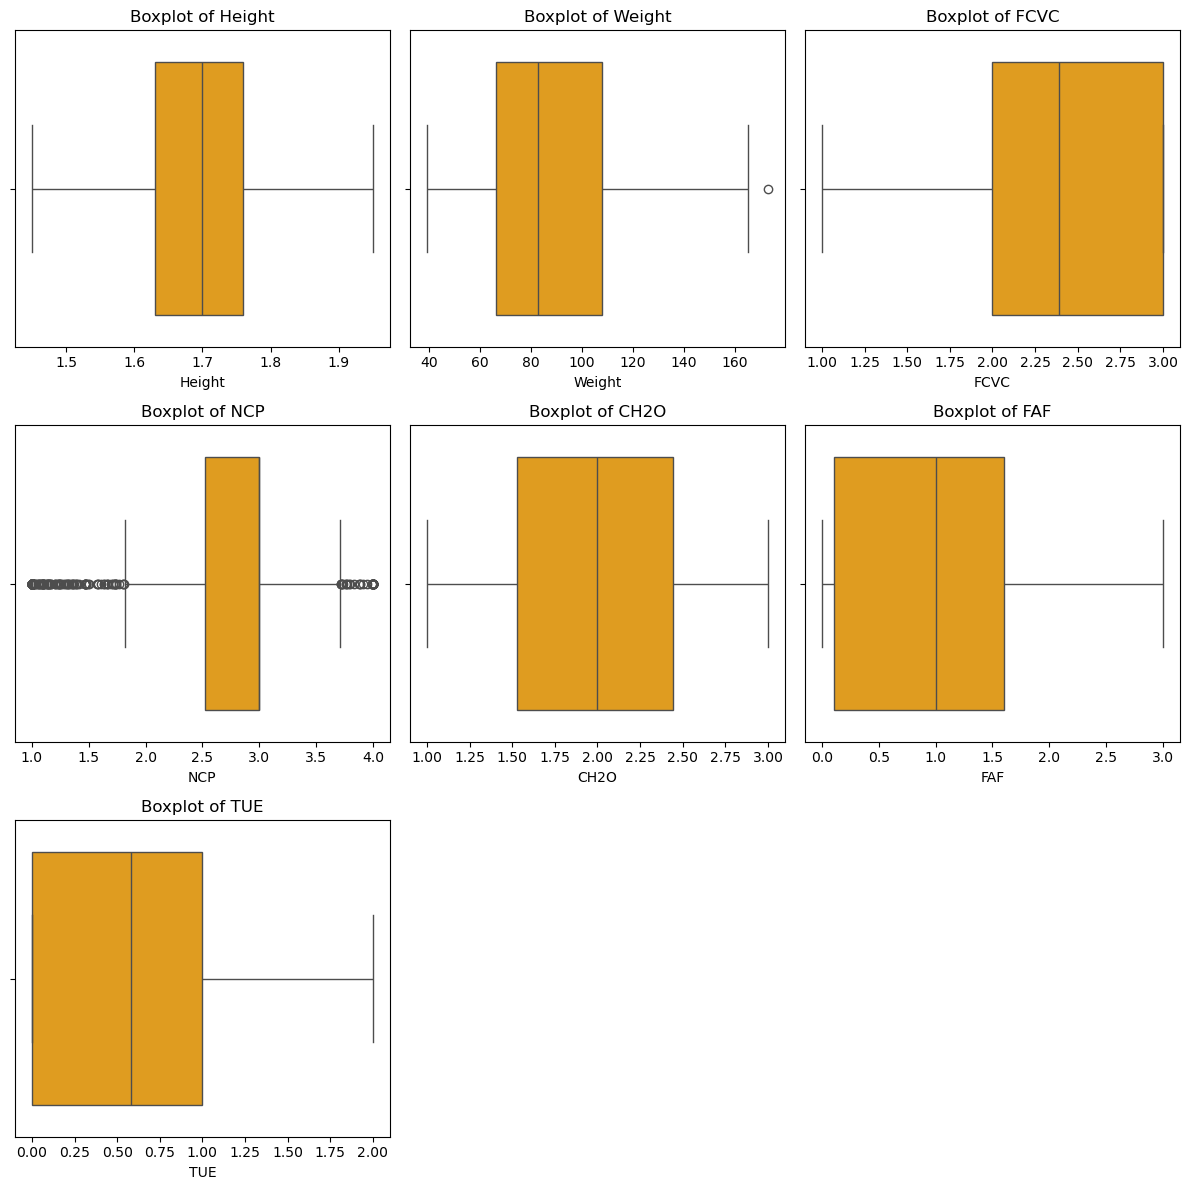

In [8]:
# Boxplot untuk Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_features = len(numerical_features)
num_rows = (num_features // 3) + (num_features % 3 > 0)

plt.figure(figsize=(12, num_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

### Masalah pada Dataset
1. Data type 'Age' object yang seharusnya float
2. Values pada kolom 'age' yang terdapat 22 Years
3. Terdapat 10 Duplicate
4. Terdapat missing value pada kolom FCVC dan MTRANS

In [9]:
# Drop Duplicate
df = df.drop_duplicates()

In [10]:
# Mengubah isi Value Age
df['Age'] = df['Age'].replace("20 years", "20")
df['Age'] = df['Age'].replace("21 years", "21")
df['Age'] = df['Age'].replace("19 years", "19")
df['Age'] = df['Age'].replace("23 years", "23")
df['Age'] = df['Age'].replace("22 years", "22")
df['Age'] = df['Age'].replace("33 years", "33")
df['Age'] = df['Age'].replace("17 years", "17")
df['Age'] = df['Age'].replace("26 years", "26")
df['Age'] = df['Age'].replace("36 years", "36")
df['Age'] = df['Age'].replace("25 years", "25")

In [11]:
# Mengubah Datatype Kolom Age
df['Age'] = df['Age'].astype('float')

In [12]:
# Mengfill missing value MTRANS menggunakan Modus
df['MTRANS'].fillna(df['MTRANS'].mode()[0], inplace=True)

# Mengfill missing value FCVC menggunakan Mean
df['FCVC'].fillna(df['FCVC'].mean(), inplace=True)

# Encoding

In [13]:
# Label Encoding
label_encoding = preprocessing.LabelEncoder()
df['Gender'] = label_encoding.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoding.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoding.fit_transform(df['FAVC'])
df['SMOKE'] = label_encoding.fit_transform(df['SMOKE'])
df['SCC'] = label_encoding.fit_transform(df['SCC'])

# Onehot Encoding
onehot_enc = OneHotEncoder(sparse_output=False)
encoded_array = onehot_enc.fit_transform(df['MTRANS'].values.reshape(-1, 1))
encoded_df = pd.DataFrame(encoded_array, columns = onehot_enc.get_feature_names_out(['MTRANS']))
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=['MTRANS'])

# Ordinal Encoding
encoder1 = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df['CAEC_encoded'] = encoder1.fit_transform(df[['CAEC']])
encoder2 = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df['CALC_encoded'] = encoder2.fit_transform(df[['CALC']])


df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_encoded,CALC_encoded
0,0,24.0,1.58,65.29,1,0,2.03,2.74,Sometimes,0,...,1.019,no,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,23.0,1.65,66.00,0,0,3.00,3.00,Sometimes,0,...,0.000,no,Normal_Weight,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,21.0,1.69,51.26,1,1,3.00,3.18,Frequently,0,...,0.625,no,Insufficient_Weight,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,0,22.0,1.69,65.00,1,1,2.00,3.00,Sometimes,0,...,1.000,Sometimes,Normal_Weight,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0,23.0,1.61,82.64,1,1,2.96,1.00,Sometimes,0,...,2.000,Sometimes,Obesity_Type_I,0.0,0.0,0.0,1.0,0.0,1.0,1.0


# Split Data

In [14]:
x = df.drop(['CAEC','CALC','NObeyesdad'], axis = 1)
y = df['NObeyesdad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('Train Data: ',x_train.shape)
print('Test Data: ',x_test.shape)

Train Data:  (836, 20)
Test Data:  (210, 20)


In [15]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_test_encoded = label_enc.transform(y_test)

# Model Random Forest

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8904761904761904

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        26
      Normal_Weight       0.85      0.83      0.84        41
     Obesity_Type_I       0.85      0.92      0.88        36
    Obesity_Type_II       1.00      0.93      0.96        27
   Obesity_Type_III       1.00      1.00      1.00        28
 Overweight_Level_I       0.86      0.82      0.84        22
Overweight_Level_II       0.82      0.77      0.79        30

           accuracy                           0.89       210
          macro avg       0.90      0.89      0.89       210
       weighted avg       0.89      0.89      0.89       210



# Model XGB Boost

In [17]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train_encoded)

y_pred_encoded = xgb_model.predict(x_test)

y_pred = label_enc.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9285714285714286

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        26
      Normal_Weight       0.93      0.98      0.95        41
     Obesity_Type_I       0.85      0.97      0.91        36
    Obesity_Type_II       1.00      0.93      0.96        27
   Obesity_Type_III       1.00      1.00      1.00        28
 Overweight_Level_I       0.85      0.77      0.81        22
Overweight_Level_II       0.89      0.83      0.86        30

           accuracy                           0.93       210
          macro avg       0.93      0.92      0.92       210
       weighted avg       0.93      0.93      0.93       210



Berdasarkan hasil evaluasi model Random Forest dan XGBoost yang sudah ditraining, dapat disimpulkan bahwa XGBoost menunjukkan performa yang lebih baik secara keseluruhan. XGBoost berhasil mencapai akurasi sebesar 92.86%, lebih tinggi dibandingkan Random Forest yang memperoleh 89.05%. Selain itu, XGBoost mencatat macro dan weighted average f1-score sebesar 0.93, sedangkan Random Forest hanya mencapai 0.89. Secara keseluruhan, XGBoost lebih unggul dari akurasi, precision dibandingkan Random Forest